In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
# import subprocess
import pandas as pd
import mdtraj as mdt
# import tempfile
from pathlib import Path
import matplotlib.pyplot as plt


import sys
sys.path.append("../analysis")
from chem_shift import do_stuff


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
traj = mdt.load("/data/gzappavigna/lmp_conf_builder/gmx/amber/step5_production_nojump.xtc", top="/data/gzappavigna/lmp_conf_builder/gmx/amber/step5_production_nojump.pdb")

In [14]:
df = do_stuff(traj, 1000)

In [16]:
df.shape

(773, 301)

In [21]:
# def _get_lines_to_skip(filename):
#     """Determine the number of comment lines in a SPARTA+ output file."""
#     # format_string = """FORMAT %4d %4s %4s %9.3f %9.3f %9.3f %9.3f %9.3f %9.3f"""
#     format_string = r"FORMAT %4d %4s %4s %9.3f %9.3f %9.3f %9.3f %9.3f %s"
#     handle = open(filename)
#     for i, line in enumerate(handle):
#         if line.find(format_string) != -1:
#             return i + 2

#     raise Exception("No format string found in SPARTA+ file!")


# names = [
#     "resSeq",
#     "resName",
#     "name",
#     "SS_SHIFT",
#     "SHIFT",
#     "RC_SHIFT",
#     "HM_SHIFT",
#     "EF_SHIFT",
#     "SIGMA",
# ]


In [ ]:
# one every 1 ns = 1000 ps
# one every 0.1 ns = 100 ps

# one_every = round(1000.0 / traj.timestep)
# inds = np.arange(0, traj.time.size, one_every)

# faspr_bin = "/home/gzappavigna/FASPR/FASPR"
# # spartaplus_bin = Path("/home/gzappavigna/SPARTA+/bin/SPARTA+.static.linux9")
# sparta_bin = Path("/home/gzappavigna/SPARTA/src/SPARTA")

# results = []


# with tempfile.TemporaryDirectory(delete=False) as d:
#     d = Path(d)

#     for i, frame in enumerate(traj[inds]):
#         pdb_cg = d / f"trj{i}_cg.pdb"
#         frame.save(pdb_cg)

#         pdb_all = d / f"trj{i}_all.pdb"

#         subprocess.run([faspr_bin, "-i", str(pdb_cg), "-o", str(pdb_all)], check=True)
#         assert pdb_all.exists()

#         pred_tab = pdb_all.parent / (pdb_all.stem + "_pred.tab")

#         subprocess.run(
#             [sparta_bin]
#             + ["-in", str(pdb_all)]
#             + ["-sum", str(pred_tab)]
#             + ["-spartaDir", str(sparta_bin.parents[1])],
#             cwd=d,
#             check=True,
#         )
#         # subprocess.run(
#         #     [spartaplus_bin]
#         #     + ["-in", *map(str, pdb_all_list)]
#         #     + ["-spartaDir", str(spartaplus_bin.parents[1])],
#         #     cwd=d,
#         #     check=True,
#         # )
#         assert pred_tab.exists()

#         lines_to_skip = _get_lines_to_skip(pred_tab)

#         df = pd.read_table(
#             pred_tab,
#             names=names,
#             header=None,
#             sep=r"\s+",
#             skiprows=lines_to_skip,
#         )
#         df["frame"] = i
#         results.append(df)

# results = pd.concat(results)

# # if rename_HN:
# #     results.name[results.name == "HN"] = "H"
# results = results.pivot_table(
#     index=["resSeq", "name"],
#     columns="frame",
#     values="SHIFT",
# )



In [24]:
ca_cs = df.loc[(slice(None), 'CA'), :]

In [25]:
mu = ca_cs.mean(axis="columns").to_numpy()
sigma = ca_cs.std(axis="columns").to_numpy()

<ErrorbarContainer object of 3 artists>

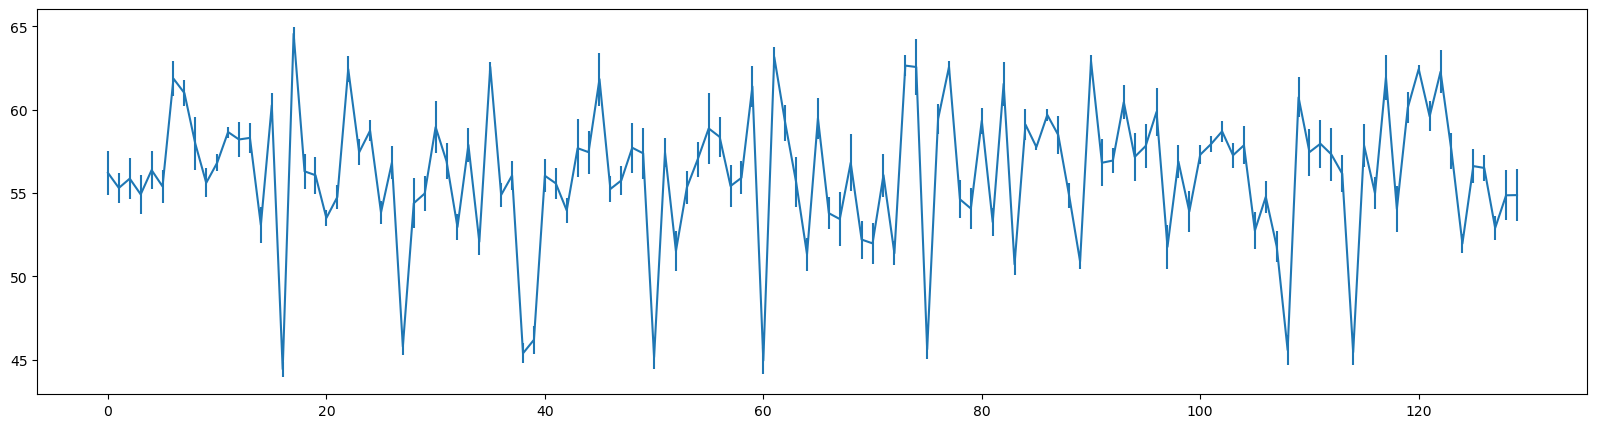

In [26]:

plt.figure(figsize=(20, 5))
plt.errorbar(x=np.arange(mu.size), y=mu, yerr=sigma)
# plt.plot(mu)

In [20]:
(inds,) = np.nonzero(mu < 46)
x = ca_cs.index[inds]

In [21]:
resSeqs = x.get_level_values("resSeq").to_numpy()

In [22]:
resSeqs

array([ 18,  29,  40,  52,  62,  77, 110, 116])

In [23]:
[res.name for res in traj.topology.residues if res.resSeq in resSeqs]

['GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY', 'GLY']